<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coding-Sorting-Algorithms" data-toc-modified-id="Coding-Sorting-Algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coding Sorting Algorithms</a></span></li></ul></div>

In [1]:
# Import libraries
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Coding Sorting Algorithms

The following sorting algorithms are coded below:

* Selection Sort
* Insertion Sort
* Merge Sort
* Quick Sort
* Counting Sort


In [2]:
# https://www.geeksforgeeks.org/selection-sort/
def selection_sort(alist):
    
    # first iteration selects each element
    for i in range(len(alist)):
        # set min_index first index
        min_index = i 
        
        # second iteration compares the element of the first iteration to every other element in the list 
        for j in range(i+1, len(alist)):
            # element value comparisons
            if alist[min_index] > alist[j]:
                # min_index becomes j index when j contains the smaller value 
                min_index = j
        
        # inner loop continues until all elements have been compared to the first loop's element and 
        # min_index now contains the lowest valued element 
        
        # the outer loop index and min-index elements are switched
        alist[i], alist[min_index] = alist[min_index], alist[i]

In [3]:
def insertion_sort(alist): 
  
     # iterate through each element in the array starting from the second element 
    for i in range(1, len(alist)): 
        
        # key is an element from unsorted side to be inserted in sorted side
        key = alist[i] 
        # j identifies elements from sorted side
        j = i-1
        
        # loop through sorted side while key is smaller than the elements therein  
        while j >= 0 and key < alist[j]: 
            # shift sorted elements to the right
            alist[j + 1] = alist[j] 
            # decrement j
            j -= 1
        
        # while loop breaks when there are no more elements in the sorted side that are greater than key  
        
        # key is inserted in the appropriate position in the sorted list
        alist[j + 1] = key 

In [4]:
def merge_sort(alist):
    # base case - if alist has just 1 element, it is sorted by default
    if len(alist) > 1:

        # get midpoint value of the list with integer division
        midpoint = len(alist) // 2
    
        # splitting the list in half using the midpoint
        left_list = alist[:midpoint]
        right_list = alist[midpoint:]

        # recursively split the left_list and right_list until the base case is reached
        merge_sort(left_list)
        merge_sort(right_list)
        
        # At the end of the recursion, all lists will contain a maximum of 1 element and thus are sorted.

        
        # Remainder of code returns to caller once base case is reached merging smaller sorted lists into larger sorted lists
        
        l = 0     # Index value for left_list
        r = 0     # Index value for right_list
        a = 0     # Index value for alist

        # compare left and right lists and merge them into sorted lists, placing the sorted elements back into alist
        
        # loops through each left and right list until it runs out of elements to check
        while l < len(left_list) and r < len(right_list):
            
            # the smallest value gets placed back into alist (<= keeps algorithm stable, maintaining order of alist ) 
            if left_list[l] <= right_list[r]: 
                alist[a] = left_list[l]
                l += 1
            else:
                alist[a] = right_list[r]
                r += 1
            # alist index is incremented for the next smallest value to be placed 
            a += 1

        # Some lists will not have left/right counterpart and so are inserted into alist below       
        while l < len(left_list):
            alist[a] = left_list[l]
            l += 1
            a += 1

        while r < len(right_list):
            alist[a] = right_list[r]
            r += 1
            a += 1

In [5]:
# main function to be called   
def quick_sort(alist):
    
    # helper function that will be called recursively to partition a list
    def quick_helper(items, low, high):
        
        # base case - recursion ends when there are no more low indexes relative to high indexes
        if low < high:
            # call the partition() function which defines the pivot and compares the other elements to it
            split_index = partition(items, low, high)
            
            # use split_index returned value high and low values in subsequent calls of helper
            quick_helper(items, low, split_index)        # left lists
            quick_helper(items, split_index + 1, high)   # right lists

    # low and high are set to the lowest and highest index values of a list
    quick_helper(alist, 0, len(alist) - 1)
    
# creates partitions and checks values of left and right lists against the pivot
def partition(alist, low, high):
    
    # middle element of a list will be the pivot
    pivot = alist[(low + high) // 2]
    
    # left-list index
    l = low - 1
    # right list index
    r = high + 1

    # runs until the value of r is returned to the split_index variable in quick_helper
    while True:
        
        # loops while values in the left list that are less than the pivot - ends when a greater value is encountered
        l += 1
        while alist[l] < pivot:
            l += 1

        # loops while values in the left list that are greater than the pivot - ends when a lesser value is encountered
        r -= 1
        while alist[r] > pivot:
            r -= 1

        # once the left and right indexes meet or overlap, the value of r is returned    
        if l >= r:
            return r
        
        # if r not returned during the loop, the value in the left list that was not less than the pivotis switched with 
        # the value on the right that was not greater than the pivot, placing them on the correct side of the pivot
        alist[l], alist[r] = alist[r], alist[l]

In [6]:
def counting_sort(alist, max_val=100):
    # create a list, count, whose indexes represent all the possible values contained in alist 
    m = max_val + 1                  
    count = [0] * m                     
    
    # iterate through alist and use the values therein as indexes in count to count the number of occurrences of each element 
    for a in alist:                  
        # increment count to record the number of times each element occurs in the alist 
        count[a] += 1                              
     
    # i represents the indexes of alist 
    i = 0
    # iterate through the indexes of count and append the correct amount of each element back into alist 
    for a in range(m):             
        for c in range(count[a]):  
            alist[i] = a         
            i += 1
    return alist

In [7]:
# Creates an array of size n consisting of random integers between the values 0-100 inclusive
def random_array(n):

    array = []
    
    for i in range(0, n):
        array.append(random.randint(0, 100))
    
    return array

In [8]:
# Input sizes
n_size = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

In [9]:
# Creates arrays for all input sizes
def all_arrays(n_size):
    
    arrays = []
    
    for n in n_size:
        arrays.append(random_array(n))
        
    return arrays
    

In [10]:
arrays = all_arrays(n_size)

In [11]:
def benchmarking(sort):
    
    # List to contain the running times for each algorithm
    sort_time = []

    # Time test for each sorting algorithm
    for array in arrays:
        start_time = time.time()
        sort(array)
        end_time = time.time()
        time_elapsed = (end_time - start_time) * 1000
        sort_time.append(time_elapsed)
    
    return sort_time

In [12]:
def average_time(sort):
    
    times = []

    # Calculate benchmarking 10 times
    for i in range(0, 10):
        time = benchmarking(sort)
        times.append(time) 
    
    arr_times = np.array(times)
    
    average = np.mean(arr_times, axis=0)
    
    return average

In [13]:
all_algorithms = [insertion_sort, selection_sort, merge_sort, quick_sort, counting_sort]

In [14]:
def all_averages():
    
    averages = []

    for a in all_algorithms:
        result = average_time(a)
        averages.append(result)
    
    return averages

In [15]:
averages = all_averages()

In [16]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df = pd.DataFrame(averages, columns=n_size, index=algorithms)

In [17]:
df.round(3)

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Insertion Sort,0.100,1.171,6.023,11.114,11.462,16.769,60.258,149.270,228.369,413.940,546.282,734.407,1040.181
Selection Sort,0.618,4.881,20.414,46.368,84.021,130.342,515.297,1159.018,1956.505,3116.019,4462.294,5917.124,7921.348
Merge Sort,0.601,1.802,3.386,5.720,7.560,9.062,20.394,33.421,42.605,57.765,78.000,89.040,113.021
Quick Sort,0.117,0.599,1.520,2.249,3.834,4.937,11.119,17.977,25.632,32.609,38.251,44.820,56.416
Counting Sort,0.200,0.267,0.499,0.598,0.499,0.798,1.995,2.892,3.942,4.044,4.880,5.785,6.914


In [18]:
df.iloc[2:4].round(3)

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Merge Sort,0.601,1.802,3.386,5.720,7.560,9.062,20.394,33.421,42.605,57.765,78.000,89.04,113.021
Quick Sort,0.117,0.599,1.520,2.249,3.834,4.937,11.119,17.977,25.632,32.609,38.251,44.82,56.416


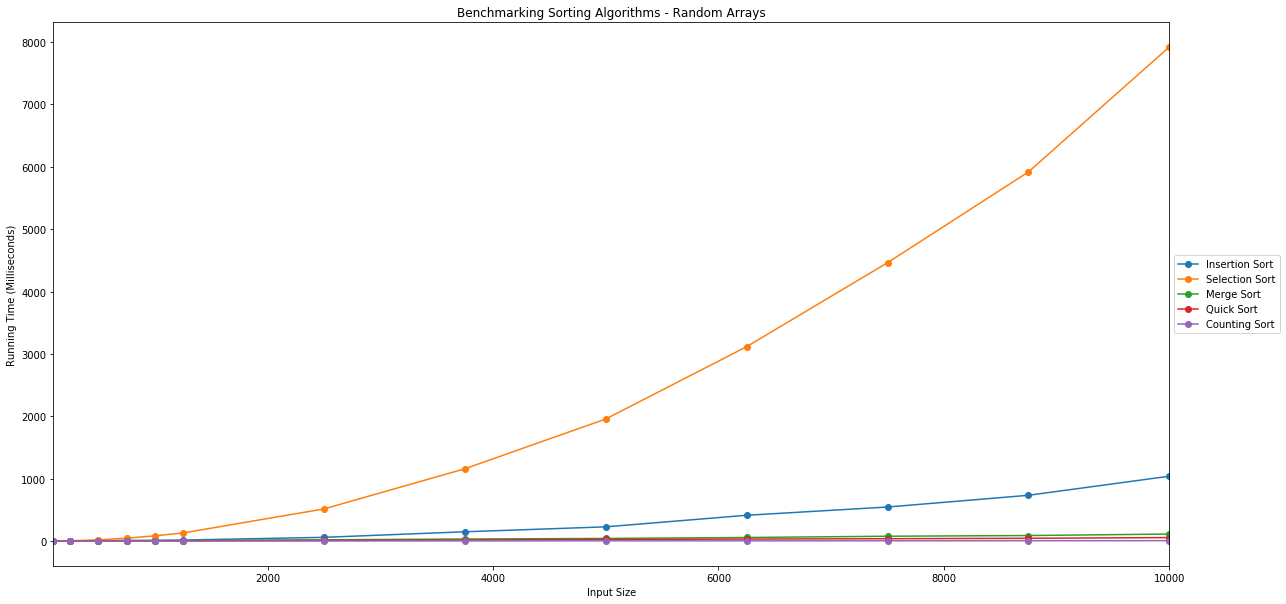

In [19]:
# https://stackoverflow.com/a/31734795
# https://stackoverflow.com/a/43610256
plot = df.iloc[:].T.plot(title="Benchmarking Sorting Algorithms - Random Arrays", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The results for Merge, Quick and Counting sorts above are very close to one another along the entire length of the plot above, making it difficult to discern any differences between them. To get a clearer picture, the plot below shows only the results of these algorithm implementations. 

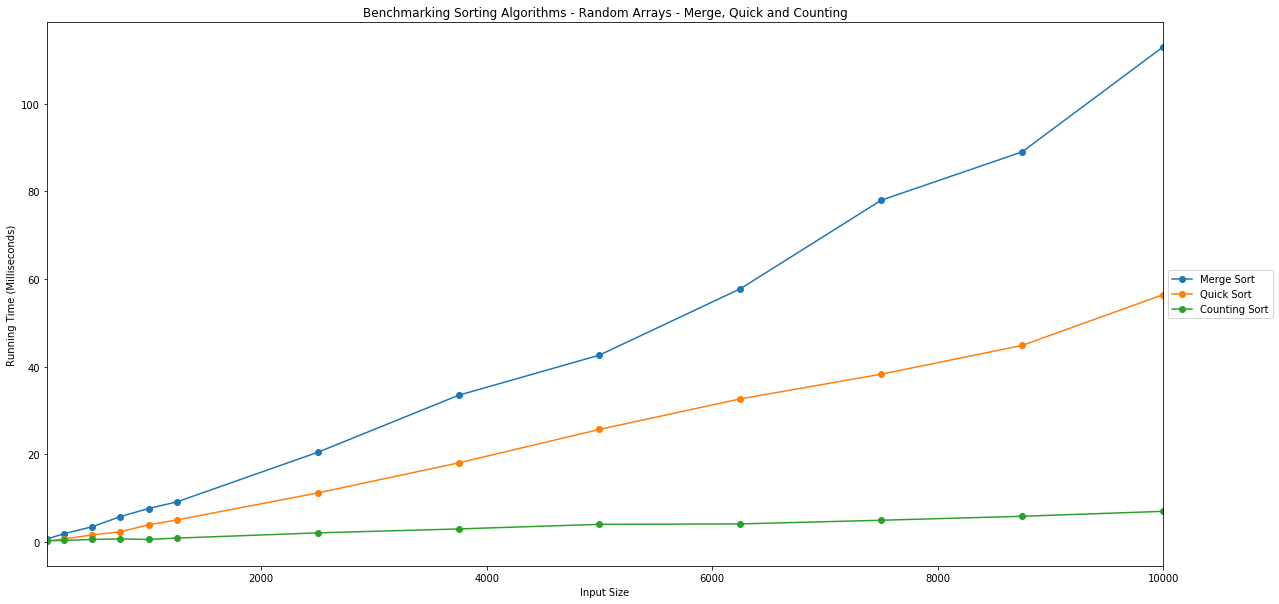

In [20]:
plot = df.iloc[2:5].T.plot(title="Benchmarking Sorting Algorithms - Random Arrays - Merge, Quick and Counting", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

In [21]:
# Tim sort averages

tim_result = average_time(sorted)

averages.append(tim_result)

print(averages)


[array([9.97781754e-02, 1.17135048e+00, 6.02314472e+00, 1.11140490e+01,
       1.14619970e+01, 1.67690992e+01, 6.02575302e+01, 1.49270225e+02,
       2.28369498e+02, 4.13940382e+02, 5.46281576e+02, 7.34406948e+02,
       1.04018137e+03]), array([6.17766380e-01, 4.88131046e+00, 2.04140663e+01, 4.63676691e+01,
       8.40207815e+01, 1.30341697e+02, 5.15296960e+02, 1.15901763e+03,
       1.95650508e+03, 3.11601923e+03, 4.46229360e+03, 5.91712370e+03,
       7.92134845e+03]), array([  0.60138702,   1.80151463,   3.3860445 ,   5.72016239,
         7.56015778,   9.06226635,  20.39384842,  33.42058659,
        42.60542393,  57.76546001,  77.99954414,  89.03951645,
       113.02056313]), array([ 0.11684895,  0.59928894,  1.51994228,  2.24876404,  3.83424759,
        4.93733883, 11.11888885, 17.97702312, 25.63197613, 32.60915279,
       38.25104237, 44.81964111, 56.41572475]), array([0.1996994 , 0.26714802, 0.49889088, 0.59790611, 0.49850941,
       0.79784393, 1.99480057, 2.89206505, 3.9417028

In [22]:
algorithms.append('Timsort')

df2 = pd.DataFrame(averages, columns=n_size, index=algorithms)
df2.round(3)

,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
Insertion Sort,0.100,1.171,6.023,11.114,11.462,16.769,60.258,149.270,228.369,413.940,546.282,734.407,1040.181
Selection Sort,0.618,4.881,20.414,46.368,84.021,130.342,515.297,1159.018,1956.505,3116.019,4462.294,5917.124,7921.348
Merge Sort,0.601,1.802,3.386,5.720,7.560,9.062,20.394,33.421,42.605,57.765,78.000,89.040,113.021
Quick Sort,0.117,0.599,1.520,2.249,3.834,4.937,11.119,17.977,25.632,32.609,38.251,44.820,56.416
Counting Sort,0.200,0.267,0.499,0.598,0.499,0.798,1.995,2.892,3.942,4.044,4.880,5.785,6.914
Timsort,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.104,0.000,0.104,0.391,0.000


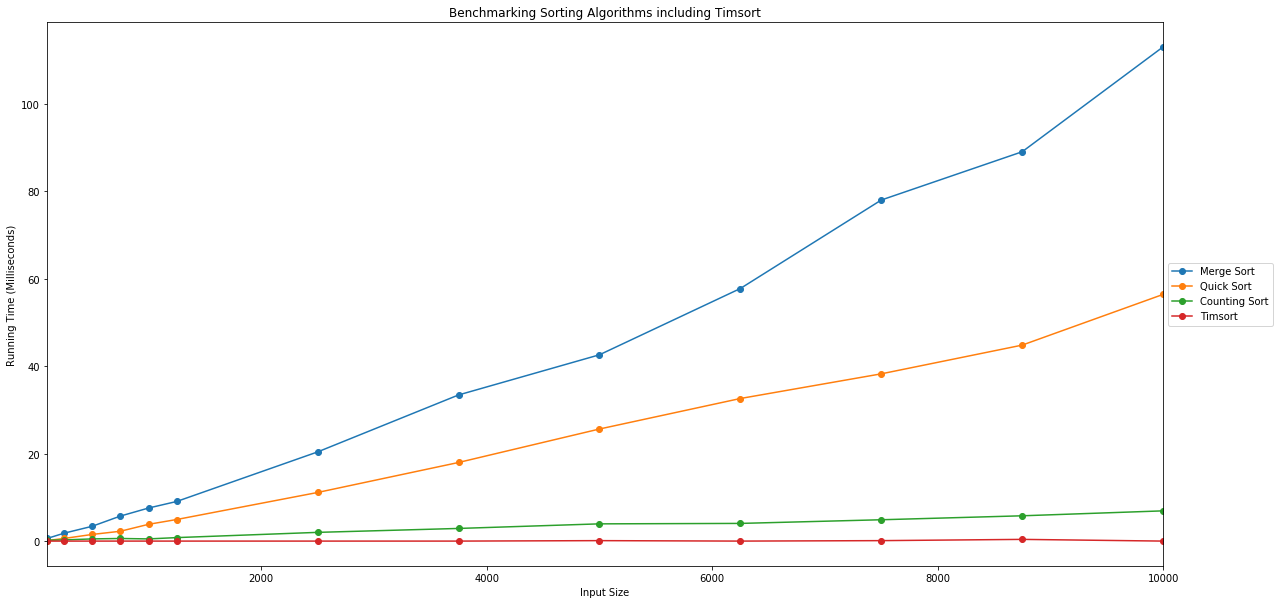

In [23]:
# Left out Insertion and Selection as can't see the differences between the others
plot = df2.iloc[2:6].T.plot(title="Benchmarking Sorting Algorithms including Timsort", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

In [24]:
algorithms.remove('Timsort')


In [25]:
# removed as the value of k will change each time
all_algorithms.remove(counting_sort)



In [26]:
algorithms.remove('Counting Sort')

In [27]:
# n_size altered as Quick Sort exceeded maximum recursion depth with full 10,000 input size
n_size = [100, 250, 500, 750, 1000, 1250, 2500]


arrays = []

for i in n_size:
    sorted_list = list(range(i))    
    arrays.append(sorted_list)

In [28]:
sorted_averages = all_averages()

In [29]:
df4 = pd.DataFrame(sorted_averages, columns=n_size, index=algorithms)
df4.round(3)

,100,250,500,750,1000,1250,2500
Insertion Sort,0.100,0.095,0.100,0.101,0.611,0.162,1.125
Selection Sort,0.399,5.289,22.841,48.830,82.861,152.850,628.855
Merge Sort,0.419,2.146,4.715,7.442,9.844,12.812,27.759
Quick Sort,0.473,0.816,2.402,4.014,5.361,5.870,15.865


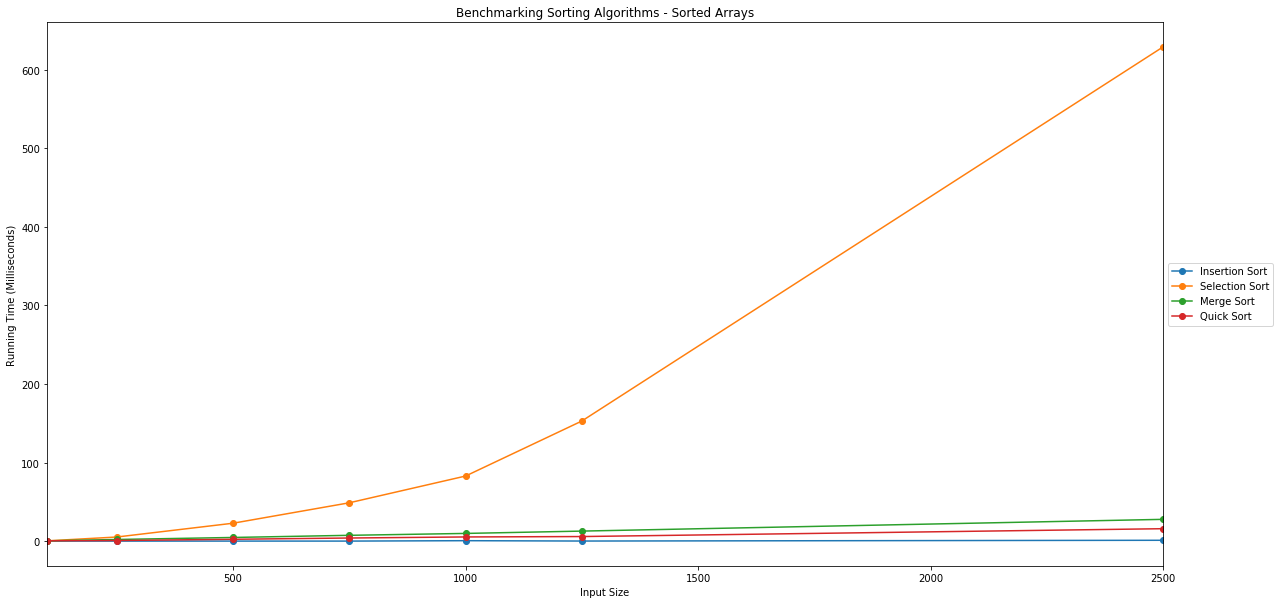

In [30]:
plot = df4.iloc[:].T.plot(title="Benchmarking Sorting Algorithms - Sorted Arrays", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [31]:
for array in arrays:
    array.reverse()

In [32]:
reversed_averages = all_averages()

In [33]:
df5 = pd.DataFrame(reversed_averages, columns=n_size, index=algorithms)
df5.round(3)

,100,250,500,750,1000,1250,2500
Insertion Sort,0.109,1.779,5.585,16.157,41.545,49.502,183.661
Selection Sort,0.647,4.767,25.435,52.126,93.401,143.380,546.626
Merge Sort,0.702,1.763,4.440,7.241,8.098,10.188,24.917
Quick Sort,0.200,0.685,1.325,2.169,3.192,4.486,8.189


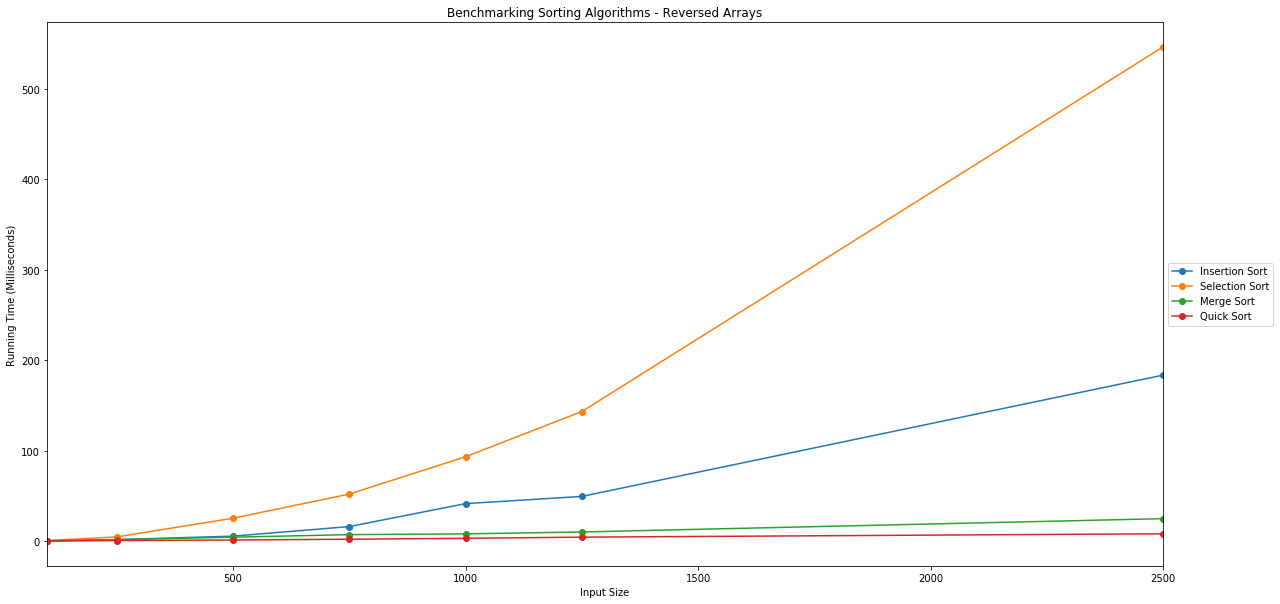

In [34]:
plot = df5.iloc[:].T.plot(title="Benchmarking Sorting Algorithms - Reversed Arrays", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [35]:
n_size = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

algorithms.append('Counting Sort')
all_algorithms.append(counting_sort)

In [36]:
arrays = all_arrays(n_size)

small_averages = all_averages()

In [37]:
algorithms = ['Insertion Sort', 'Selection Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort']

df3 = pd.DataFrame(small_averages, columns=n_size, index=algorithms)
df3

,5,10,15,20,25,30,35,40,45,50
Insertion Sort,0.099683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Selection Sort,0.000000,0.000000,0.000000,0.099826,0.261331,0.099754,0.080371,0.119328,0.039411,0.000000
Merge Sort,0.000000,0.113654,0.028634,0.099850,0.180149,0.099754,0.102639,0.447822,0.127649,0.096774
Quick Sort,0.000000,0.000000,0.193834,0.000000,0.099802,0.119066,0.000000,0.099468,0.230002,0.054264
Counting Sort,0.099921,0.000000,0.199437,0.000000,0.099754,0.042629,0.000000,0.103259,0.192976,0.099826


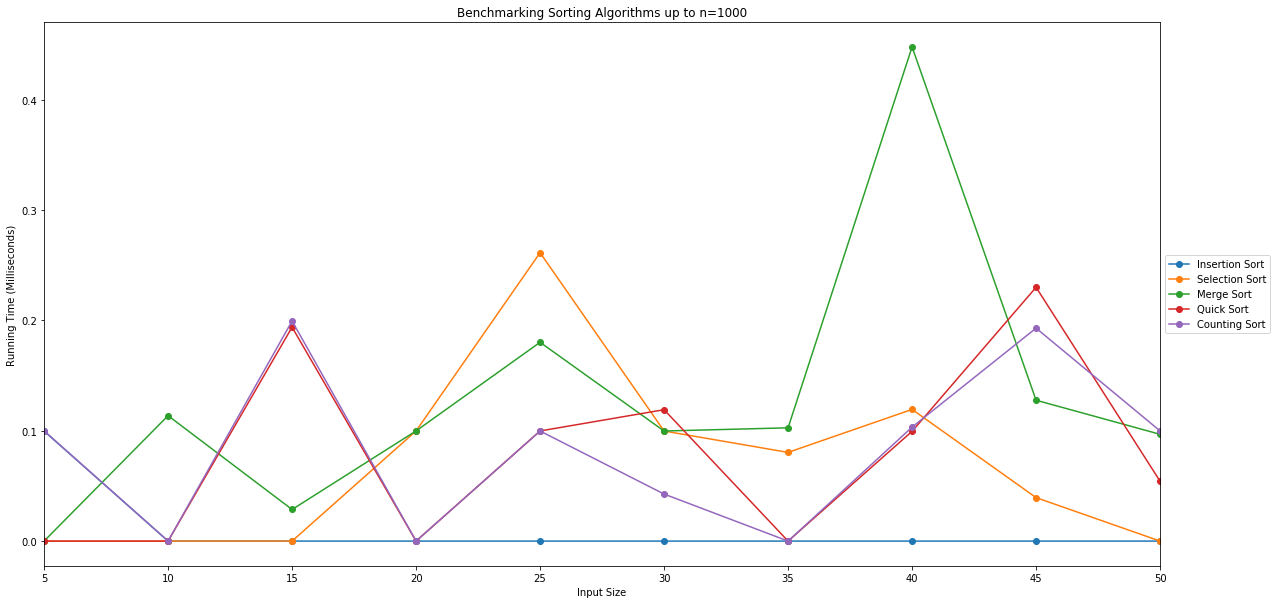

In [38]:
plot = df3.iloc[:].T.plot(title="Benchmarking Sorting Algorithms up to n=1000", figsize=(20, 10), style='-o')
plot.set(xlabel="Input Size", ylabel="Running Time (Milliseconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks(n_size)
plt.show()

In [39]:
arrays = []

for i in n_size:
    sorted_list = list(range(i))    
    arrays.append(sorted_list)
    
print(arrays)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,